# Plotting the weather data 

- Running in the 24hr environment kernel 
- Functions are built on from 24hr weather script

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pytz

In this project I have converted all the metadata to UTC so should be comparable to the weather data without needing to change timezones

In [2]:
def read_and_process_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Rename the specified column
    df.rename(columns={'Timestamp (UTC+0)': 'date_time'}, inplace=True)
    
    # Convert the date column to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    return df

# Run the function for all the data
ten_min_23 = read_and_process_csv('../metadata/2023/10min_Oct22_Aug23_weather.csv')
daily_23 = read_and_process_csv('../metadata/2023/Daily_Oct22_Aug23_weather.csv')
hourly_23 = read_and_process_csv('../metadata/2023/Hourly_Oct22_Aug23_weather.csv')

ten_min_24 = read_and_process_csv('../metadata/2024/10_min.csv')
hourly_24 = read_and_process_csv('../metadata/2024/Hourly.csv')
daily_24 = read_and_process_csv('../metadata/2024/Daily.csv')

#Concatenate the different years
ten_min = pd.concat([ten_min_23, ten_min_24])
hourly = pd.concat([hourly_23, hourly_24])
daily = pd.concat([daily_23, daily_24])

# Convert the date columns to datetime format with error handling
daily['AirTC_TMn'] = pd.to_datetime(daily['AirTC_TMn'], errors='coerce', format='%d/%m/%Y %H:%M')
daily['AirTC_TMx'] = pd.to_datetime(daily['AirTC_TMx'], errors='coerce', format='%d/%m/%Y %H:%M')

/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_21330/1416644188.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_21330/1416644188.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_21330/1416644188.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


### Read in collections and filter the data
- Also want to read in a dataframe that provides the start and end times of the different experiments 
    - all_2022_23 (any not from 2024, full 2022 - 2023 period)
    - weekly_2023 (just the time period when weekly samples were collected)
    - all_2023 (monthly and weekly samples)
    - all_2024 (collected weekly the whole time)
- Can add other start and end times to this if I am interested
- this means I am getting specific start and end dates, which I could elongate as I did download more info

In [3]:
#Start & End times from different experiments - recorded as BST
collections = pd.read_csv('../metadata/collections.csv')
collections['Start'] = pd.to_datetime(collections['Start'], format='%d/%m/%Y %H:%M', errors='coerce')
collections['End'] = pd.to_datetime(collections['End'], format='%d/%m/%Y %H:%M', errors='coerce')

In [4]:
# Filter the data by start and end times
def filter_data_by_collection(data, collections):
    # Dictionary to store the filtered DataFrames
    filtered_dfs = {}

    # Iterate over each row in the collection DataFrame
    for _, row in collections.iterrows():
        # Filter the data DataFrame to include only the timestamps within the specified range
        filtered = data[(data['date_time'] >= row['Start']) & (data['date_time'] <= row['End'])]
        
        # Store the filtered DataFrame in the dictionary with the collection name as the key
        filtered_dfs[row['Experiment']] = filtered

    return filtered_dfs

# Filter the datasets by collection periods
ten_min_filtered = filter_data_by_collection(ten_min, collections)
hourly_filtered = filter_data_by_collection(hourly, collections)
daily_filtered = filter_data_by_collection(daily, collections) 

# Can access each filtered DataFrame using the collection name e.g.
# daily_filtered['weekly_2023']

## Daily plot

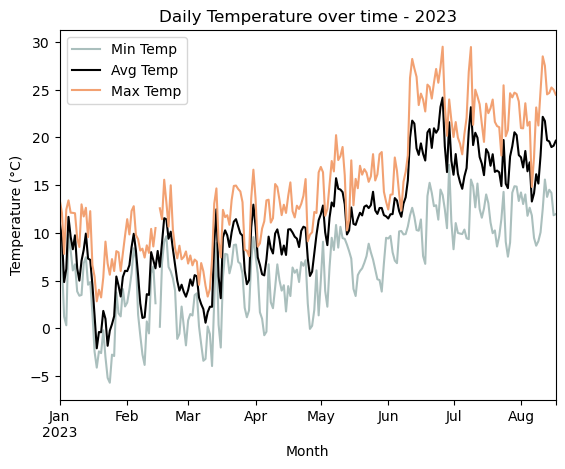

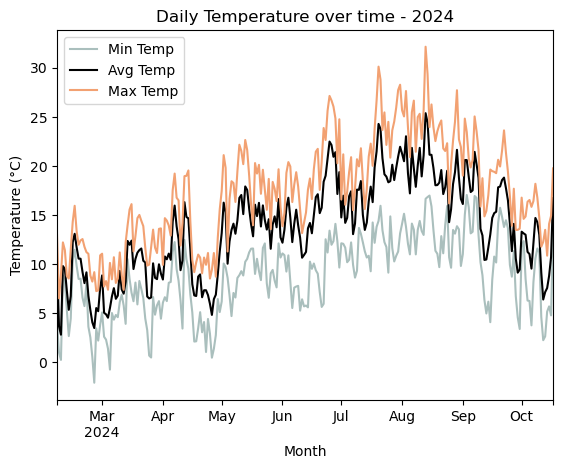

In [ ]:
# def plot_daily_temperature(experiment, year, title_ending):
#     # Plot the data
#     w = daily_filtered[experiment].plot(x='date_time',
#                                         y=['Min_AirTC', 'PTemp_C_Avg', 'Max_AirTC'],
#                                         kind='line',
#                                         color=['#AABFBD', 'black', '#F2A172'],
#                                         label=['Min Temp', 'Avg Temp', 'Max Temp'])

#     w.set_xlabel('Month')
#     w.set_ylabel('Temperature (°C)')
#     w.tick_params(axis='x', which='minor', bottom=False)
#     plt.title(f'Daily Temperature over time - {title_ending}')
#     plt.savefig(f'../Graphs/Weather/daily_temp_min_max_{experiment}.pdf')
#     plt.show()

# # Run the function
# plot_daily_temperature('all_2023', 2023, '2023')
# plot_daily_temperature('all_2024', 2024, '2024')


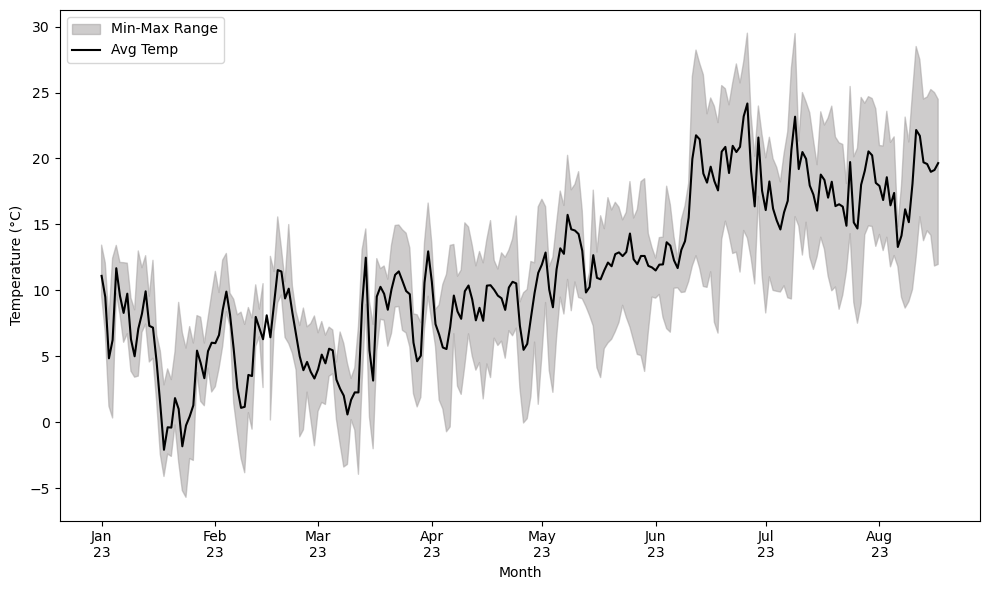

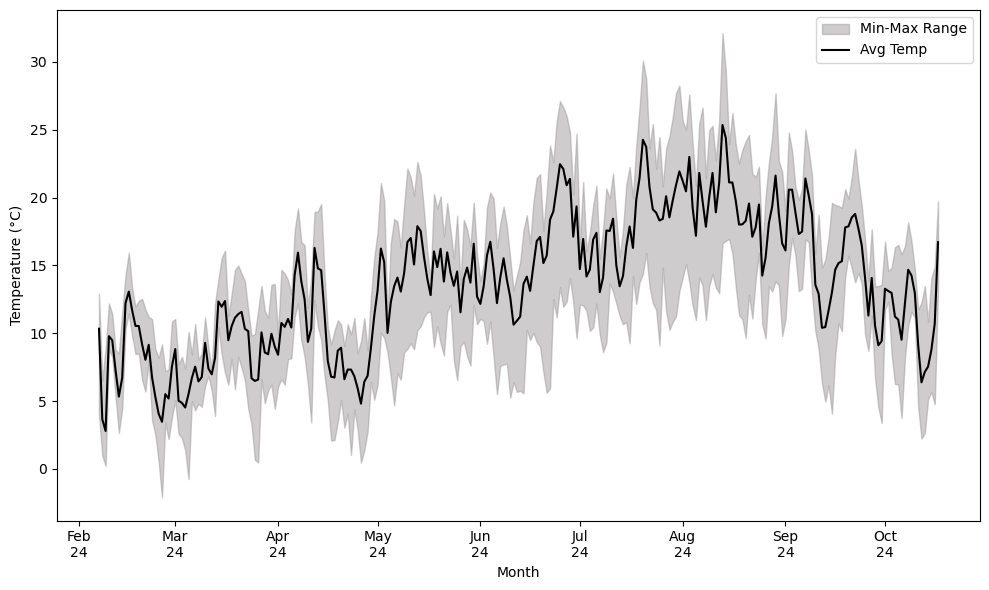

In [ ]:
def plot_daily_temperature(experiment):
    # Filter and prepare data
    df = daily_filtered[experiment]
    df = df.sort_values('date_time')  # Ensure dates are sorted

    fig, ax = plt.subplots(figsize=(10, 6))

    # Shaded area between min and max temperature
    ax.fill_between(df['date_time'], df['Min_AirTC'], df['Max_AirTC'], 
                    color="#9E9A9A", alpha=0.5, label='Min-Max Range')

    # Plot lines
    ax.plot(df['date_time'], df['PTemp_C_Avg'], color='black', label='Avg Temp')

    # X-axis formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

    # Axis labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature (°C)')
    ax.tick_params(axis='x', which='minor', bottom=False)
    plt.legend()
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Graphs/Weather/daily_temp_{experiment}.pdf')
    plt.show()
plot_daily_temperature('all_2023')
plot_daily_temperature('all_2024')

## Hourly plots

Plotting the average of each day with SE because otherwise it's too much data over so many months. 

/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_80942/3145463281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly['Date'] = hourly['date_time'].dt.date  # add a column for date
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_80942/3145463281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly['Date'] = pd.to_datetime(hourly['Date'])
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_80942/3145463281.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

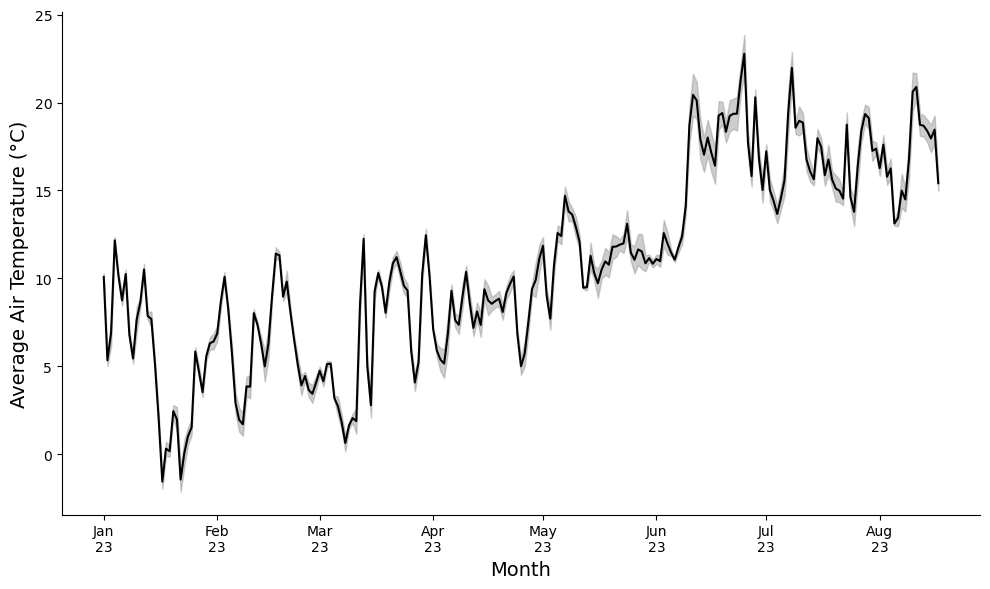

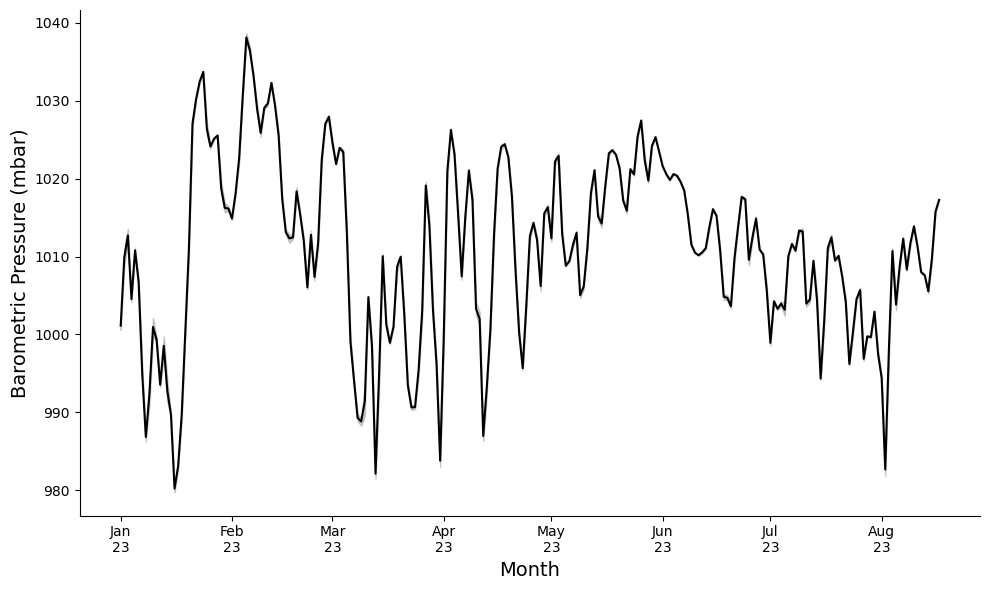

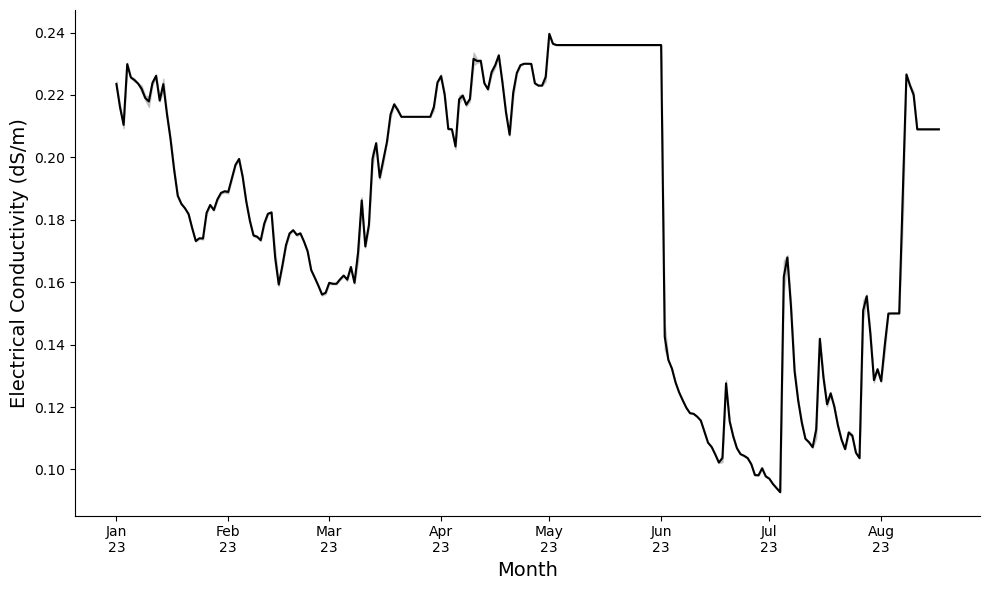

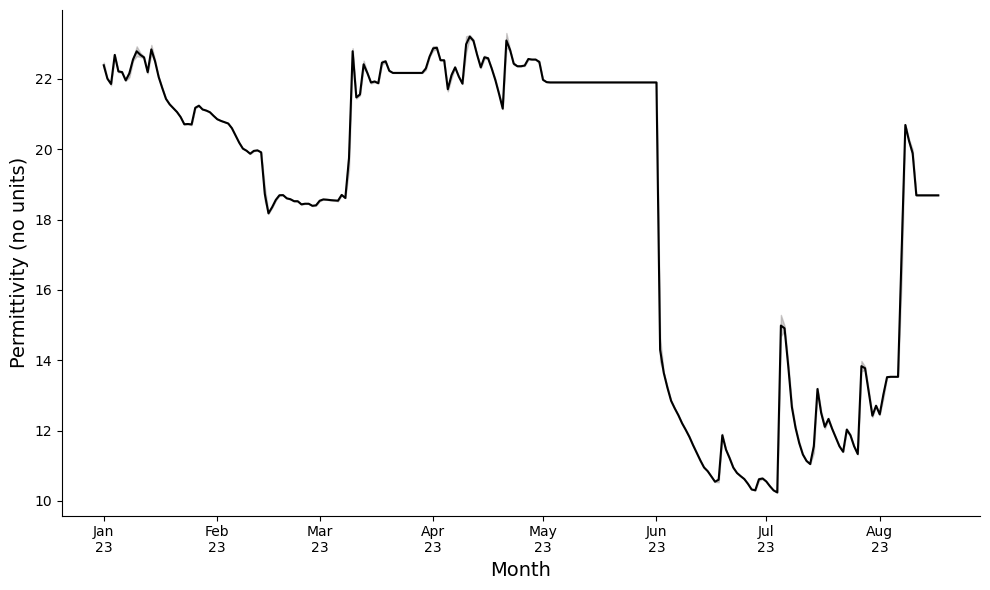

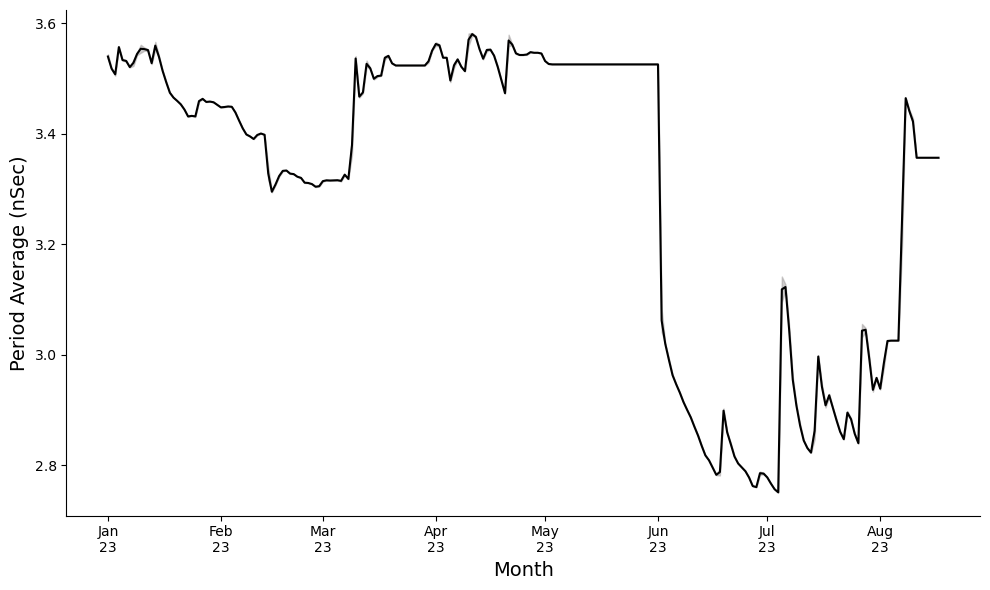

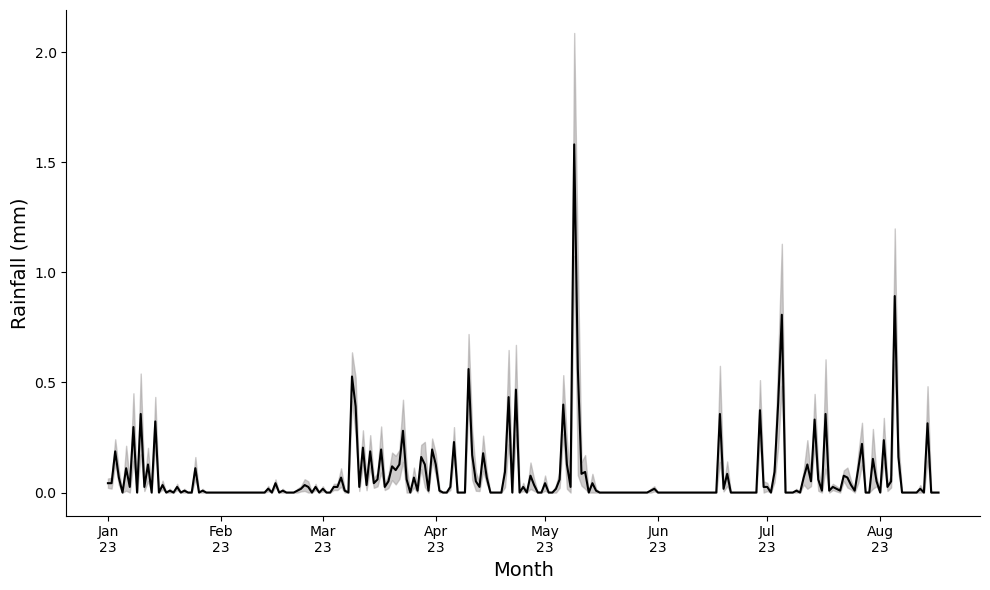

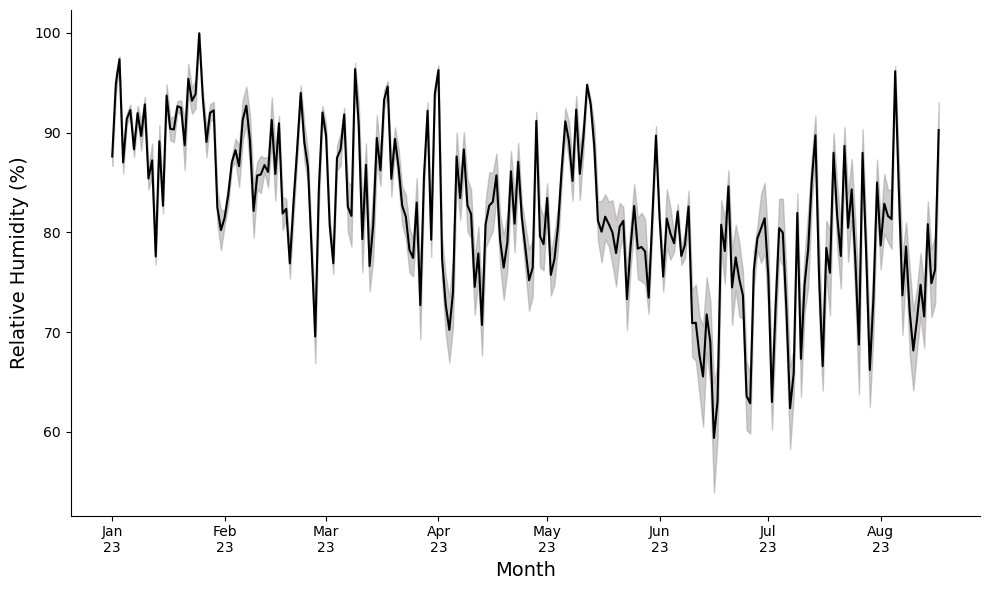

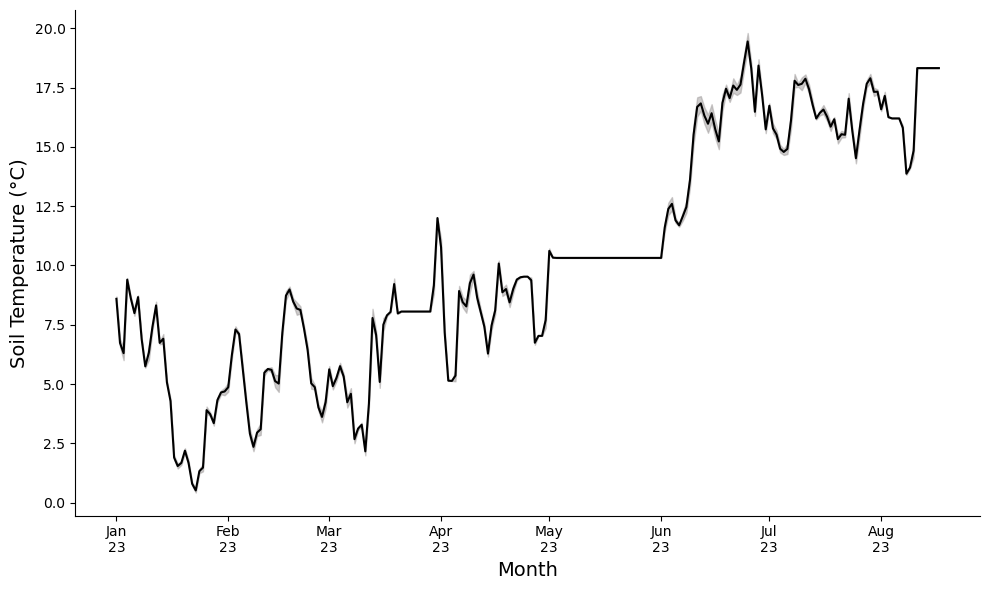

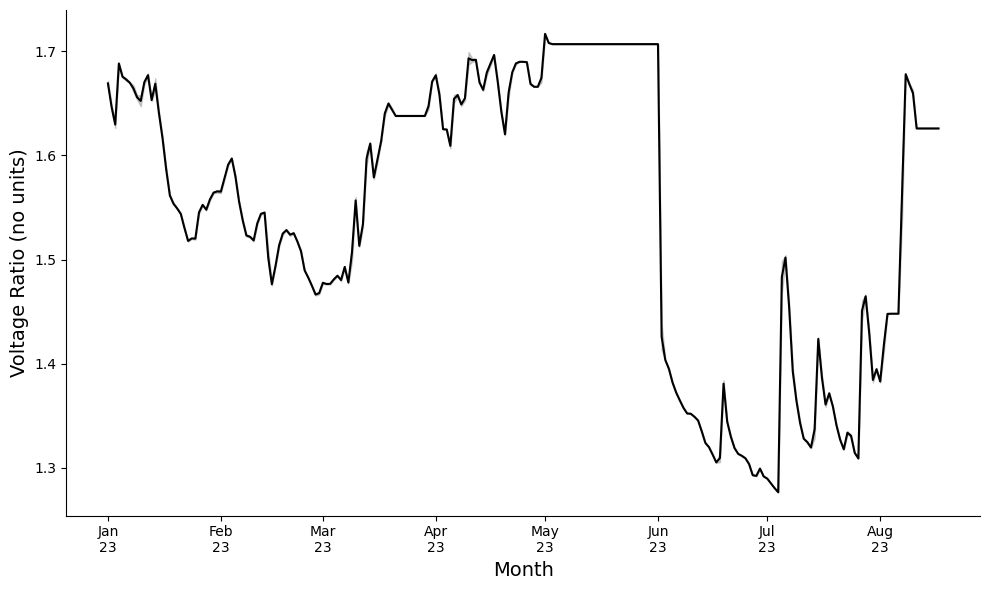

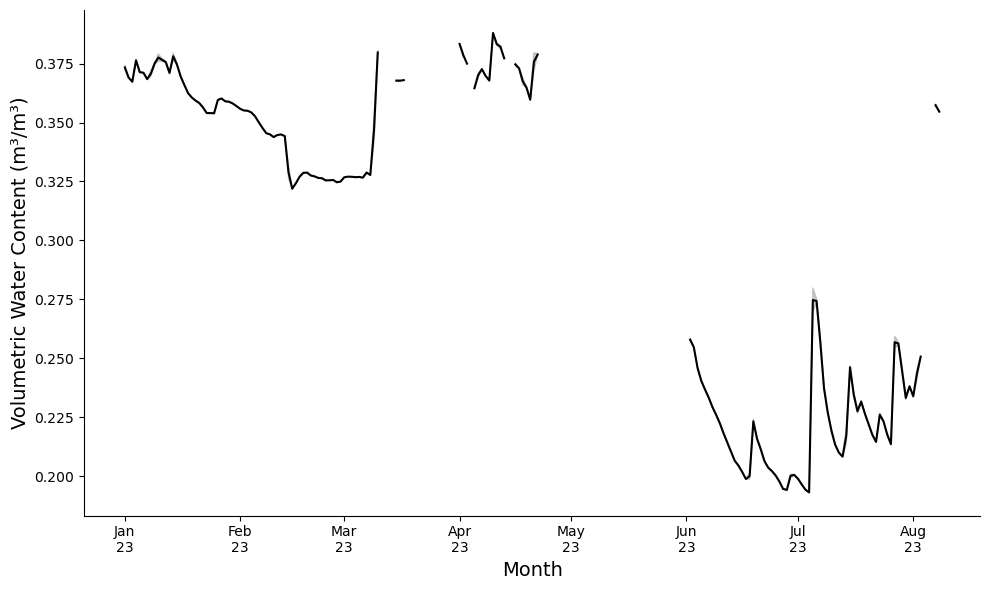

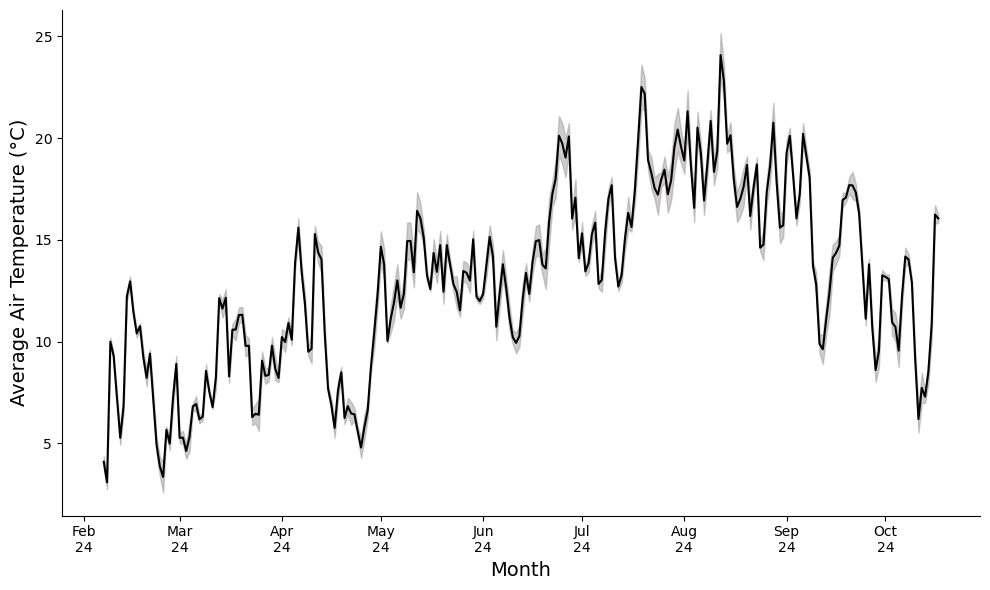

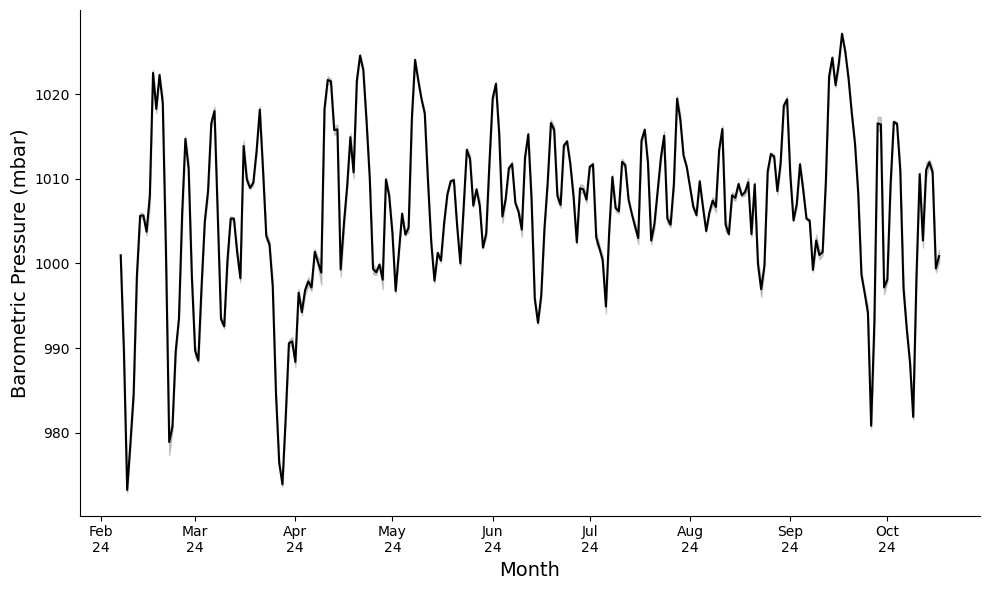

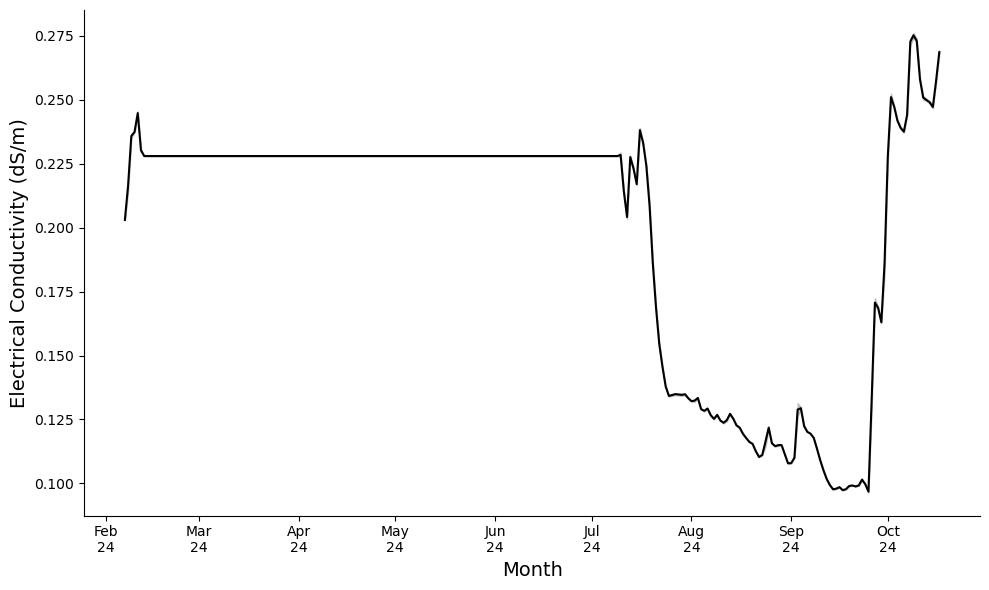

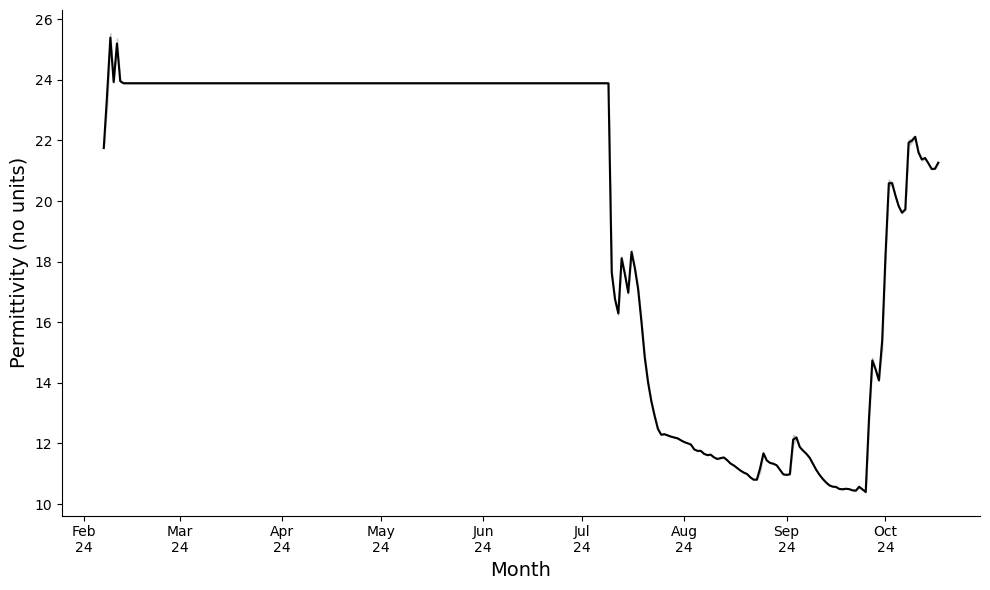

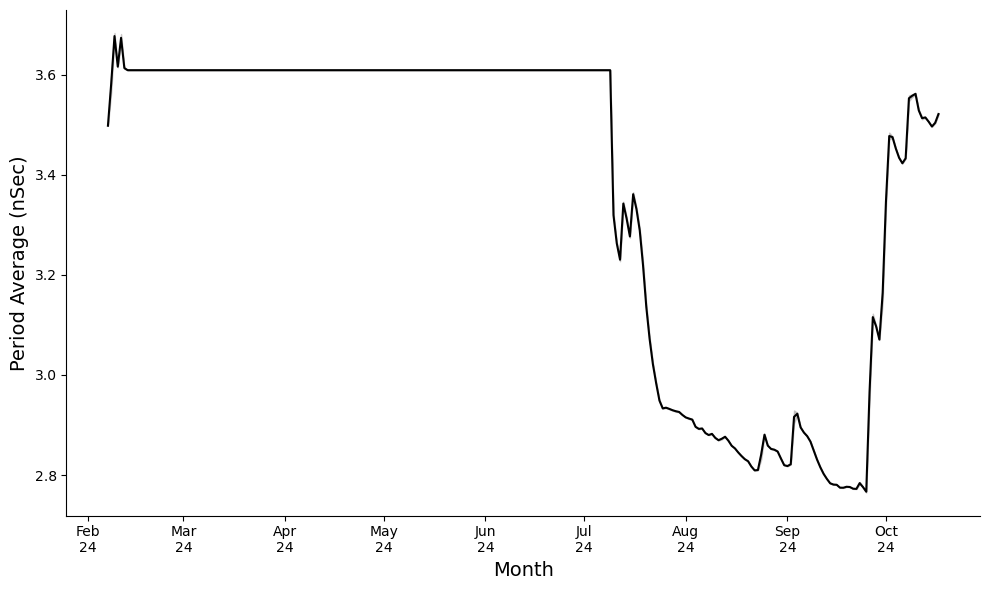

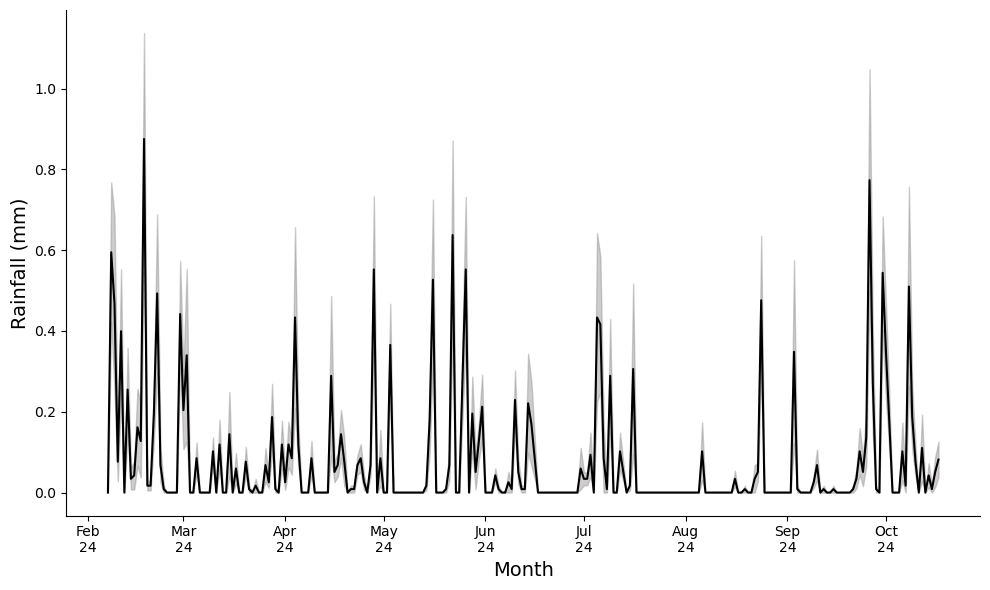

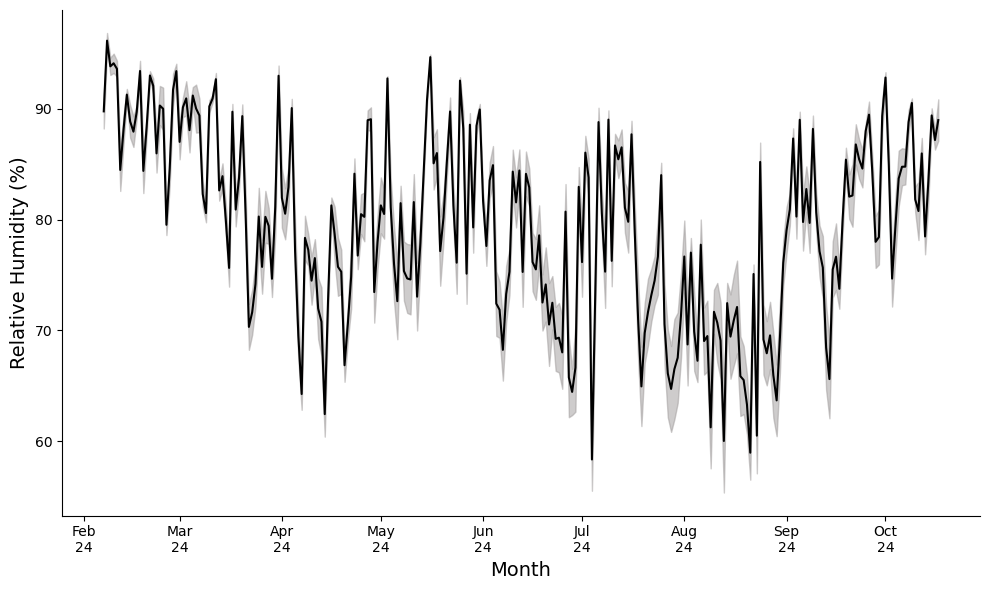

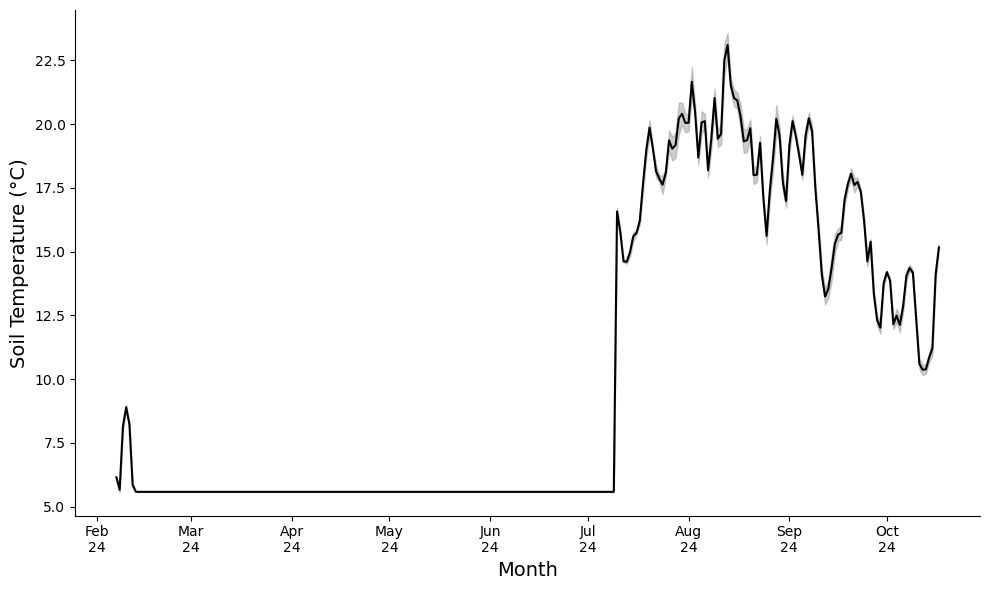

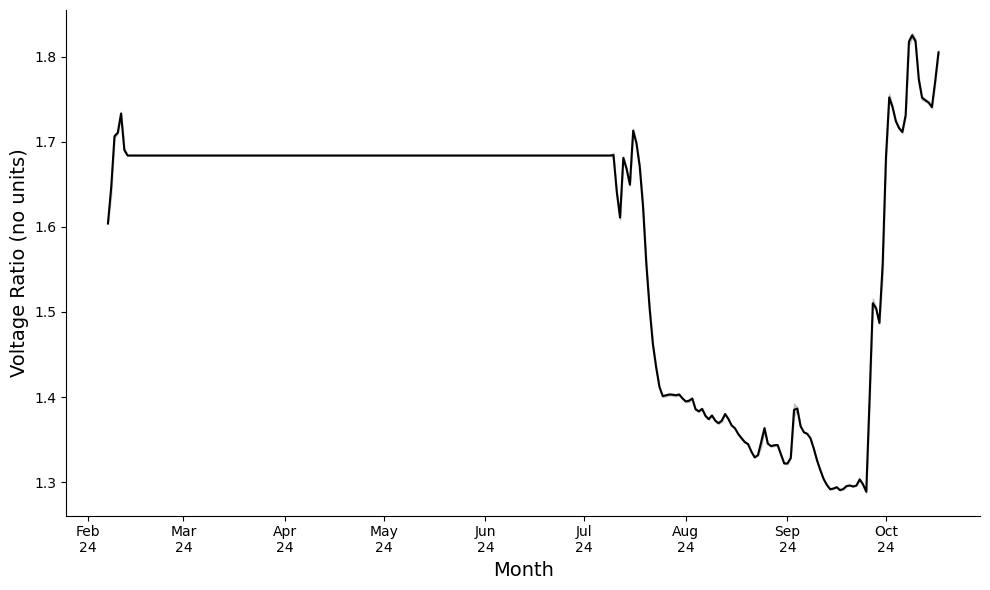

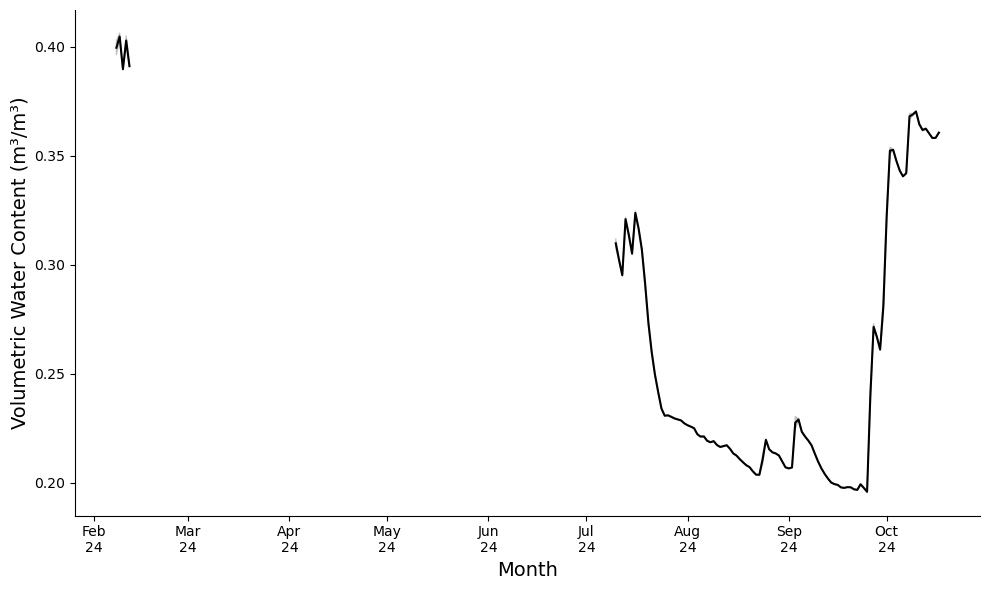

In [26]:
def plot_hourly_data(experiment, plot_title):
    hourly = hourly_filtered[experiment]

    hourly['Date'] = hourly['date_time'].dt.date  # add a column for date
    hourly['Date'] = pd.to_datetime(hourly['Date'])

    # Specify the columns you don't want to include in the aggregation
    columns_to_exclude = ['Date', 'date_time']

    # Get the list of columns you want to include in the aggregation
    columns_to_include = [col for col in hourly.columns if col not in columns_to_exclude]

    # Perform the aggregation on the selected columns
    group_hour = hourly.groupby('Date')[columns_to_include].agg(['mean', 'sem'])

    # Create a figure and axis object for each variable
    for variable in group_hour.columns.levels[0]:
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot the standard error as error bars
        # ax.errorbar(group_hour.index, group_hour[(variable, 'mean')],
        #             yerr=group_hour[(variable, 'sem')],
        #             fmt='none', ecolor="#9E9A9A", capsize=2, label='SE')

        # Set up the shaded area for standard error
        mean_series = group_hour[(variable, 'mean')]
        sem_series = group_hour[(variable, 'sem')]

        lower_bound = mean_series - sem_series
        upper_bound = mean_series + sem_series

        # Plot the shaded standard error area
        ax.fill_between(group_hour.index, lower_bound, upper_bound,
                        color="#9E9A9A", alpha=0.5, label='Standard Error Range')


        # Plot the mean line
        ax.plot(group_hour.index, group_hour[(variable, 'mean')],
                 linestyle='-', markersize=5, label=variable, color='black')

        # X-axis formatting
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

        # Nice labels
        if variable == 'AirTC_Avg':
            ylabel = 'Average Air Temperature (°C)'
            title = f'Average Air Temperature'
        elif variable == 'RH':
            ylabel = 'Relative Humidity (%)'
            title = f'Relative Humidity'
        elif variable == 'VWC_Avg':
            ylabel = 'Volumetric Water Content (m³/m³)'
            title = f'Volumetric Water Content'
        elif variable == 'EC_Avg':
            ylabel = 'Electrical Conductivity (dS/m)'
            title = f'Electrical Conductivity'
        elif variable == 'T_Avg':
            ylabel = 'Soil Temperature (°C)'
            title = f'Soil Temperature'
        elif variable == 'P_Avg':
            ylabel = 'Permittivity (no units)'
            title = f'Permittivity'
        elif variable == 'PA_Avg':
            ylabel = 'Period Average (nSec)'
            title = f'Period Average'
        elif variable == 'VR_Avg':
            ylabel = 'Voltage Ratio (no units)'
            title = f'Voltage Ratio'
        elif variable == 'Rain_mm_Tot':
            ylabel = 'Rainfall (mm)'
            title = f'Rainfall'
        elif variable == 'BP_mbar_Avg':
            ylabel = 'Barometric Pressure (mbar)'
            title = f'Barometric Pressure'
        else:
            ylabel = 'Value'
            title = f'{variable} Plot - {experiment}'

        # Set labels and title
        ax.set_xlabel('Month', fontsize=14)
        ax.set_ylabel(ylabel, fontsize=14)
        # ax.set_title(f'{title} {plot_title}', fontsize=16)

        # Add legend
        # ax.legend(fontsize=12)

        # Remove the top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Show plot
        plt.tight_layout()
        plt.savefig(f'../Graphs/Weather/hourly_{variable}_{experiment}.pdf')

# For the data
plot_hourly_data('all_2023', 'for 2023')
plot_hourly_data('all_2024', 'for 2024')

## Look into the 10 minute data 

Currently also plotting daiy average of the 10 min data, which I think makes sense when looking over a year

/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_80942/3347447797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_min['Date'] = ten_min['date_time'].dt.date  # add a column for date
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_80942/3347447797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_min['Date'] = pd.to_datetime(ten_min['Date'])


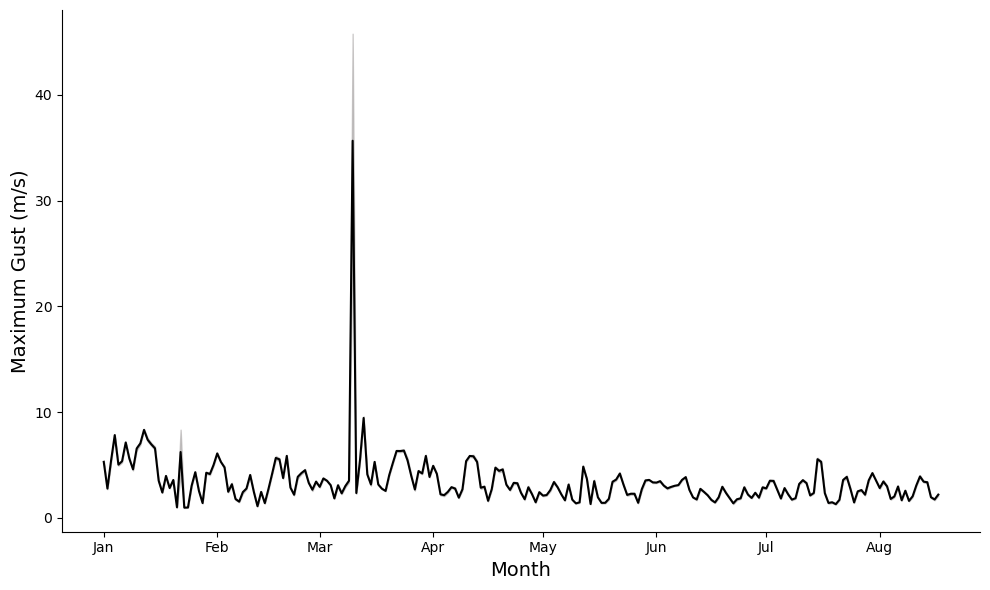

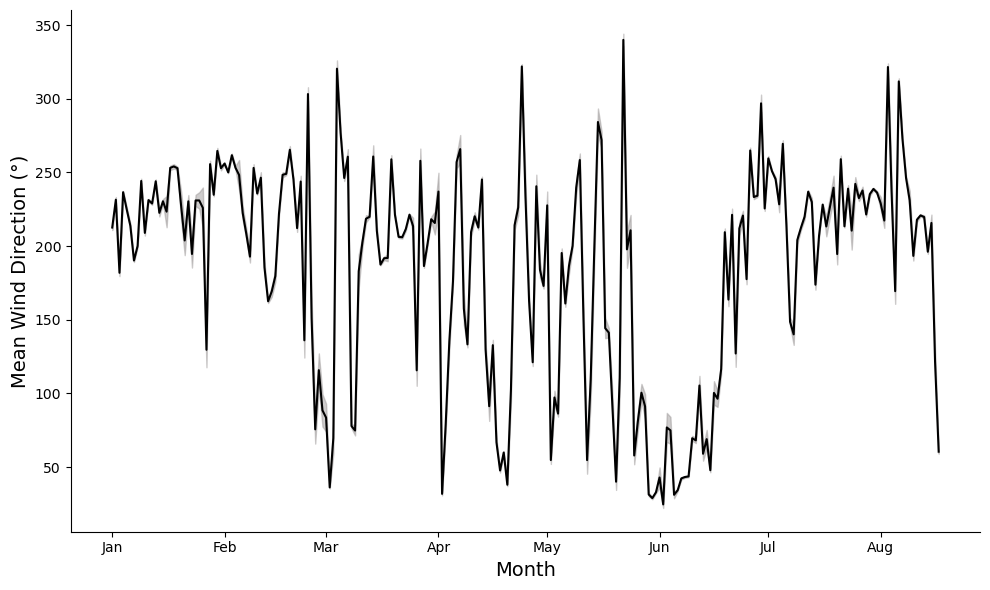

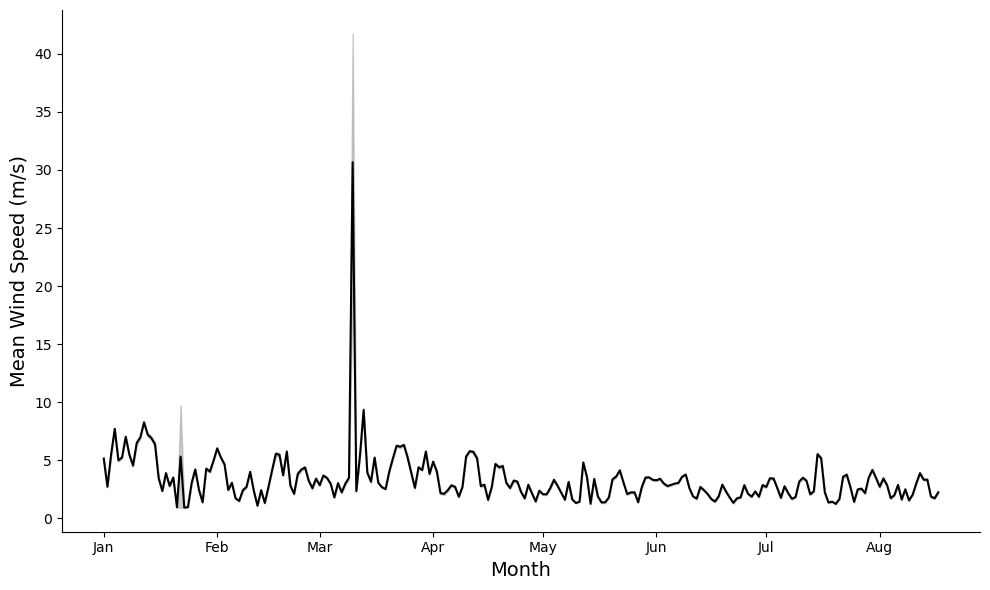

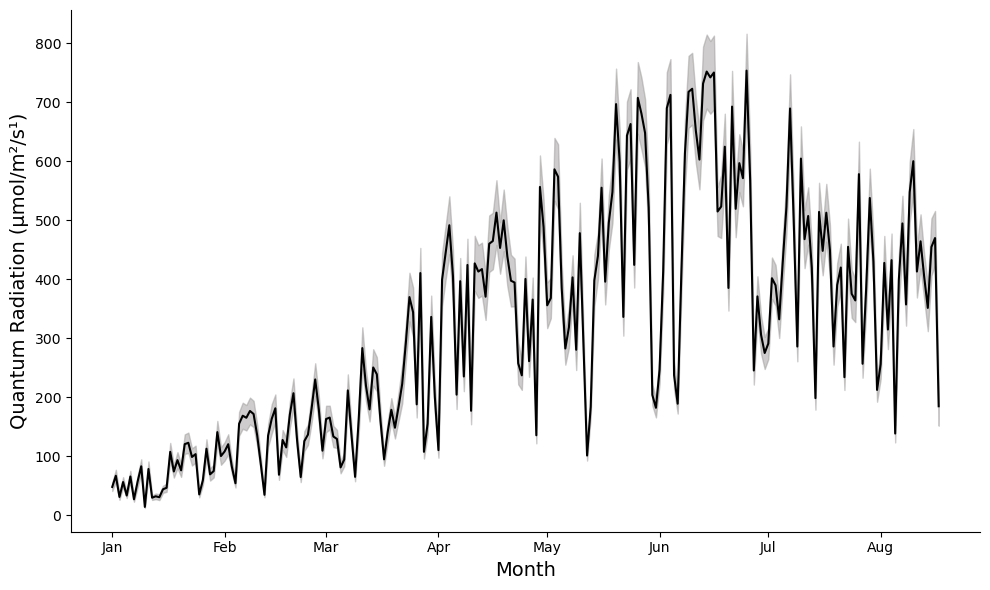

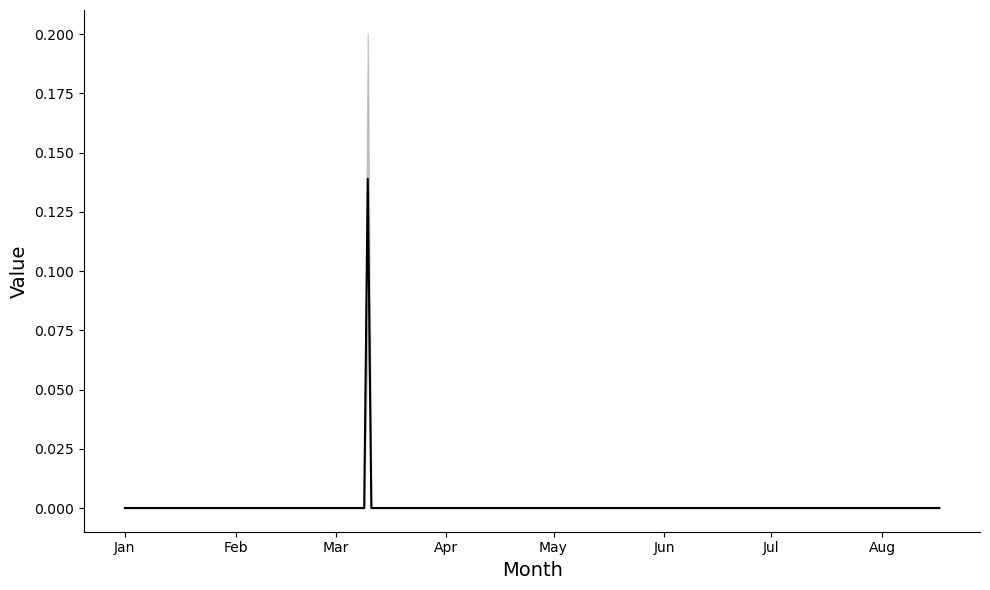

/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_80942/3347447797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_min['Date'] = ten_min['date_time'].dt.date  # add a column for date
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_80942/3347447797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_min['Date'] = pd.to_datetime(ten_min['Date'])


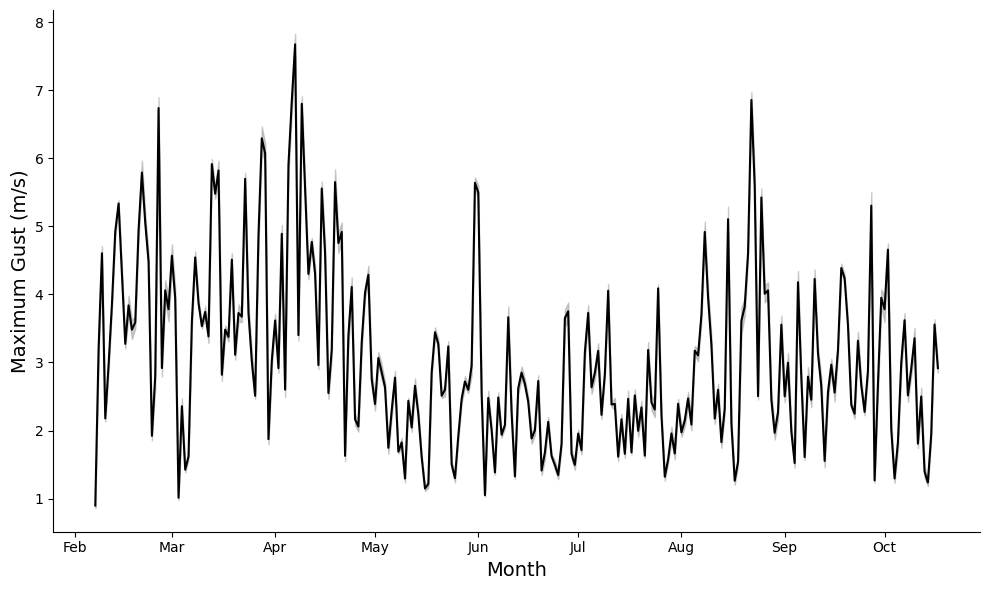

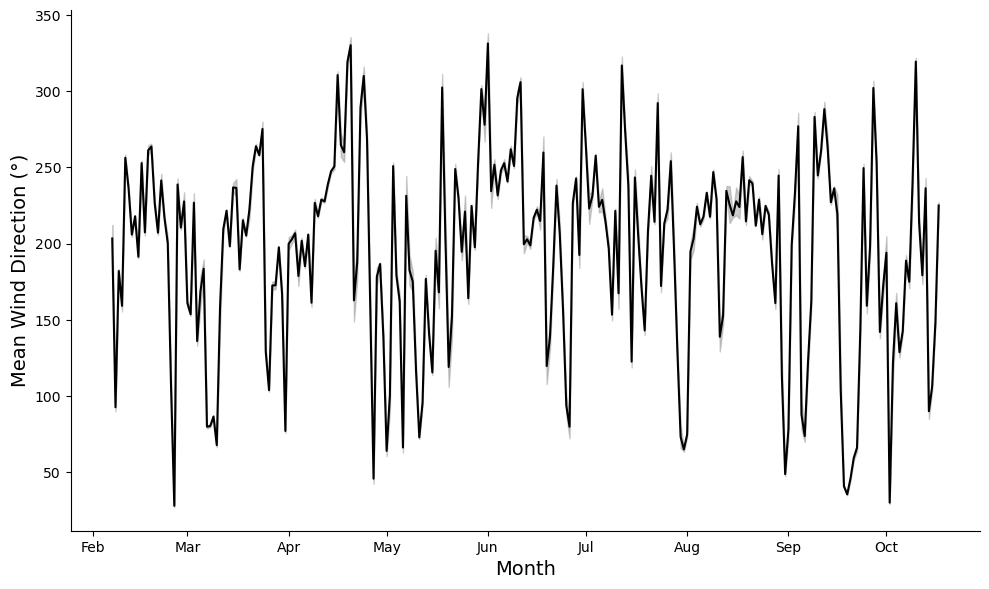

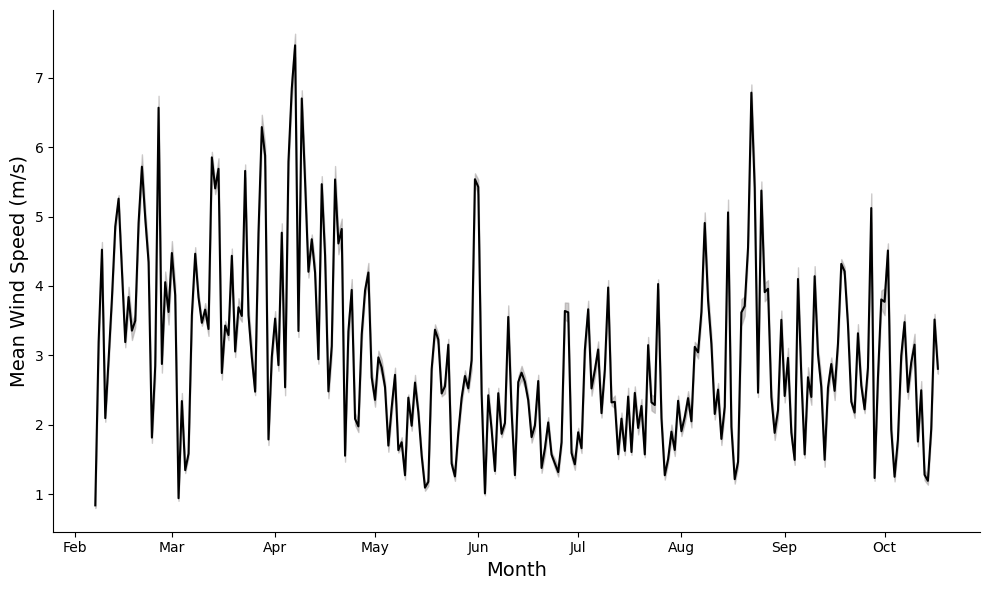

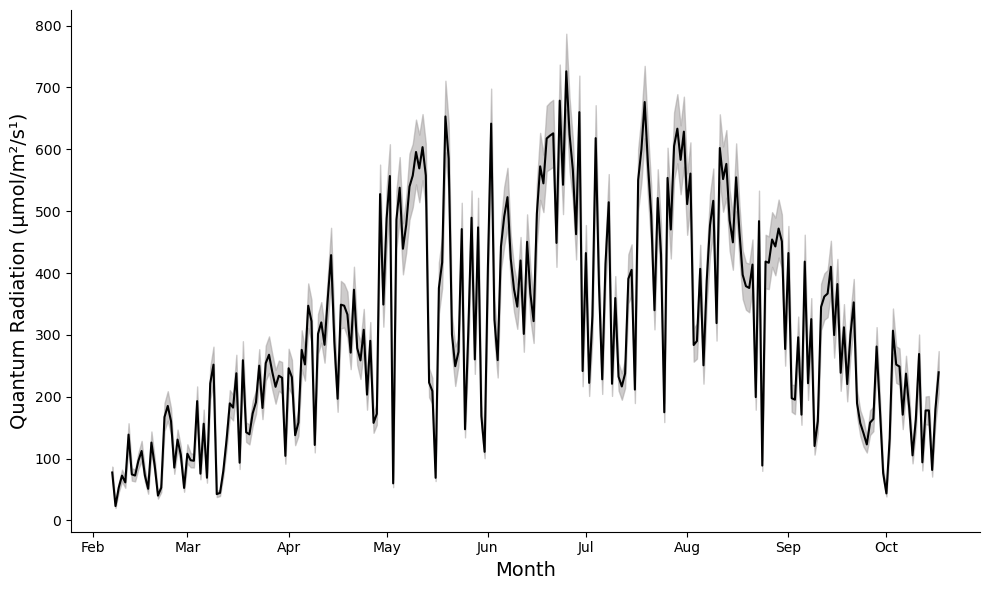

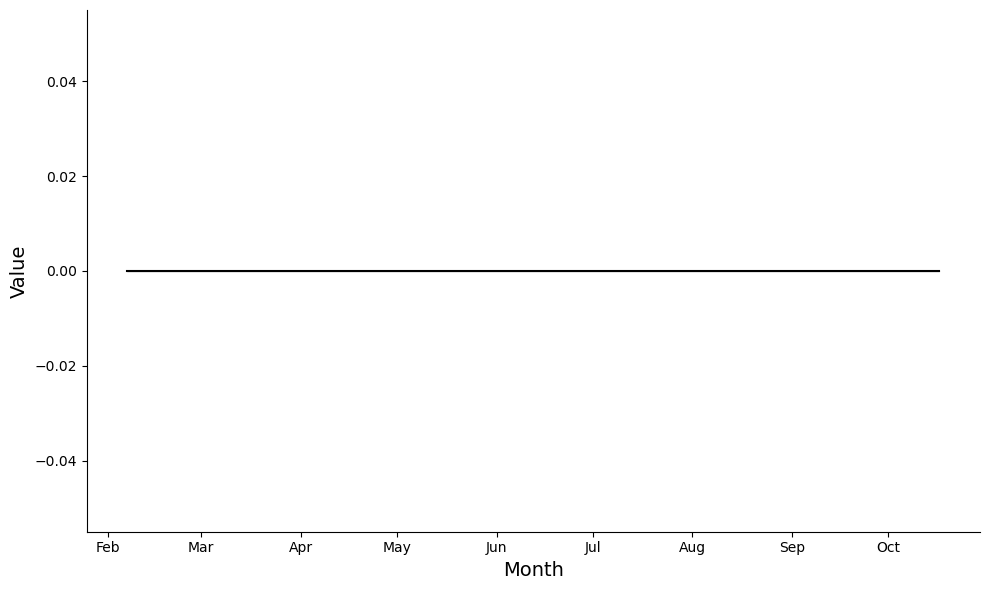

In [29]:
def plot_ten_min_data(experiment, plot_title):
    ten_min = ten_min_filtered[experiment]

    ten_min['Date'] = ten_min['date_time'].dt.date  # add a column for date
    ten_min['Date'] = pd.to_datetime(ten_min['Date'])

    # Specify the columns you don't want to include in the aggregation
    columns_to_exclude = ['Date', 'date_time']

    # Get the list of columns you want to include in the aggregation
    columns_to_include = [col for col in ten_min.columns if col not in columns_to_exclude]

    # Perform the aggregation on the selected columns
    group_min = ten_min.groupby('Date')[columns_to_include].agg(['mean', 'sem'])

    # Get the first level of the column names
    variables = group_min.columns.get_level_values(0).unique()

    # Create a figure and axis object for each variable
    for variable in variables:
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot the standard error as error bars
        # ax.errorbar(group_min.index, group_min[(variable, 'mean')], yerr=group_min[(variable, 'sem')], fmt='none', ecolor='#F2A172', capsize=2, label='SE')

        # Set up the shaded area for standard error
        mean_series = group_min[(variable, 'mean')]
        sem_series = group_min[(variable, 'sem')]

        lower_bound = mean_series - sem_series
        upper_bound = mean_series + sem_series

        # Plot the shaded standard error area
        ax.fill_between(group_min.index, lower_bound, upper_bound,
                        color="#9E9A9A", alpha=0.5, label='Standard Error Range')

        # Plot the mean line
        ax.plot(group_min.index, group_min[(variable, 'mean')], linestyle='-', markersize=5, label=variable, color='black')

        # Format the x-axis to display dates nicely
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

        # Nice labels
        if variable == 'QR_Avg':
            ylabel = 'Quantum Radiation (μmol/m²/s¹)'
            title = f'Average Quantum Radiation'
        elif variable == 'Mean_WS':
            ylabel = 'Mean Wind Speed (m/s)'
            title = f'Mean Wind Speed for Wind Vector'
        elif variable == 'Mean_WD':
            ylabel = 'Mean Wind Direction (°)'
            title = f'Mean Wind Direction for Wind Vector'
        elif variable == 'Gust_Max':
            ylabel = 'Maximum Gust (m/s)'
            title = f'Maximum Gust'
        else:
            ylabel = 'Value'
            title = f'{variable}'

        # Set labels and title
        ax.set_xlabel('Month', fontsize=14)
        ax.set_ylabel(ylabel, fontsize=14)
        # ax.set_title(f'{title} {plot_title}', fontsize=16)


        # Remove the top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Show plot
        plt.tight_layout()
        plt.savefig(f'../Graphs/Weather/ten_min_{variable}_{experiment}.pdf')
        plt.show()

# Run the function
plot_ten_min_data('all_2023', 'for 2023')
plot_ten_min_data('all_2024', 'for 2024')


# Panel plot time

- get the original functions from chatGPT
- try to add a red line to show the overall mean for each year

In [42]:
def plot_grouped_mean_sem_data(experiment, variable, nice_label, ax, source):
    df = {'hourly': hourly_filtered, 'ten_min': ten_min_filtered}[source][experiment]
    df['Date'] = pd.to_datetime(df['date_time'].dt.date)
    columns_to_exclude = ['Date', 'date_time']
    columns_to_include = [col for col in df.columns if col not in columns_to_exclude]
    group_data = df.groupby('Date')[columns_to_include].agg(['mean', 'sem'])

    if variable not in group_data.columns.levels[0]:
        return  # Skip if variable is missing

    mean_series = group_data[(variable, 'mean')]
    sem_series = group_data[(variable, 'sem')]
    lower_bound = mean_series - sem_series
    upper_bound = mean_series + sem_series

    # Add a red line for the overall mean
    overall_mean = df[variable].mean()
    ax.axhline(overall_mean, color='#8B0000', linestyle='--', linewidth=0.7, label='Season Mean')

    # Plot the shaded standard error area
    ax.fill_between(group_data.index, lower_bound, upper_bound, color="#9E9A9A", alpha=0.75)
    # Plot the mean line
    ax.plot(group_data.index, mean_series, color='black', linewidth=0.8)

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))
    ax.set_xlabel('Month')
    ax.set_ylabel(nice_label)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


In [41]:
def plot_daily_temperature_on_ax(experiment, ax):
    df = daily_filtered[experiment]
    df = df.sort_values('date_time')
    
    # Add a dark red line for the overall mean temperature
    overall_mean_temp = df['PTemp_C_Avg'].mean()
    ax.axhline(overall_mean_temp, color='#8B0000', linestyle='--', linewidth=0.7, label='Season Mean')

    # Shaded area between min and max temperature
    ax.fill_between(df['date_time'], df['Min_AirTC'], df['Max_AirTC'], color="#9E9A9A", alpha=0.75, label='Min-Max Range')
    
    # Plot average temperature
    ax.plot(df['date_time'], df['PTemp_C_Avg'], color='black', label='Avg Temp', linewidth=0.8)


    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature (°C)')
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_21330/4014094546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['date_time'].dt.date)
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_21330/4014094546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['date_time'].dt.date)
/var/folders/ns/9skdzql508n7rzzgbqpc2wpw000f7r/T/ipykernel_21330/4014094546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

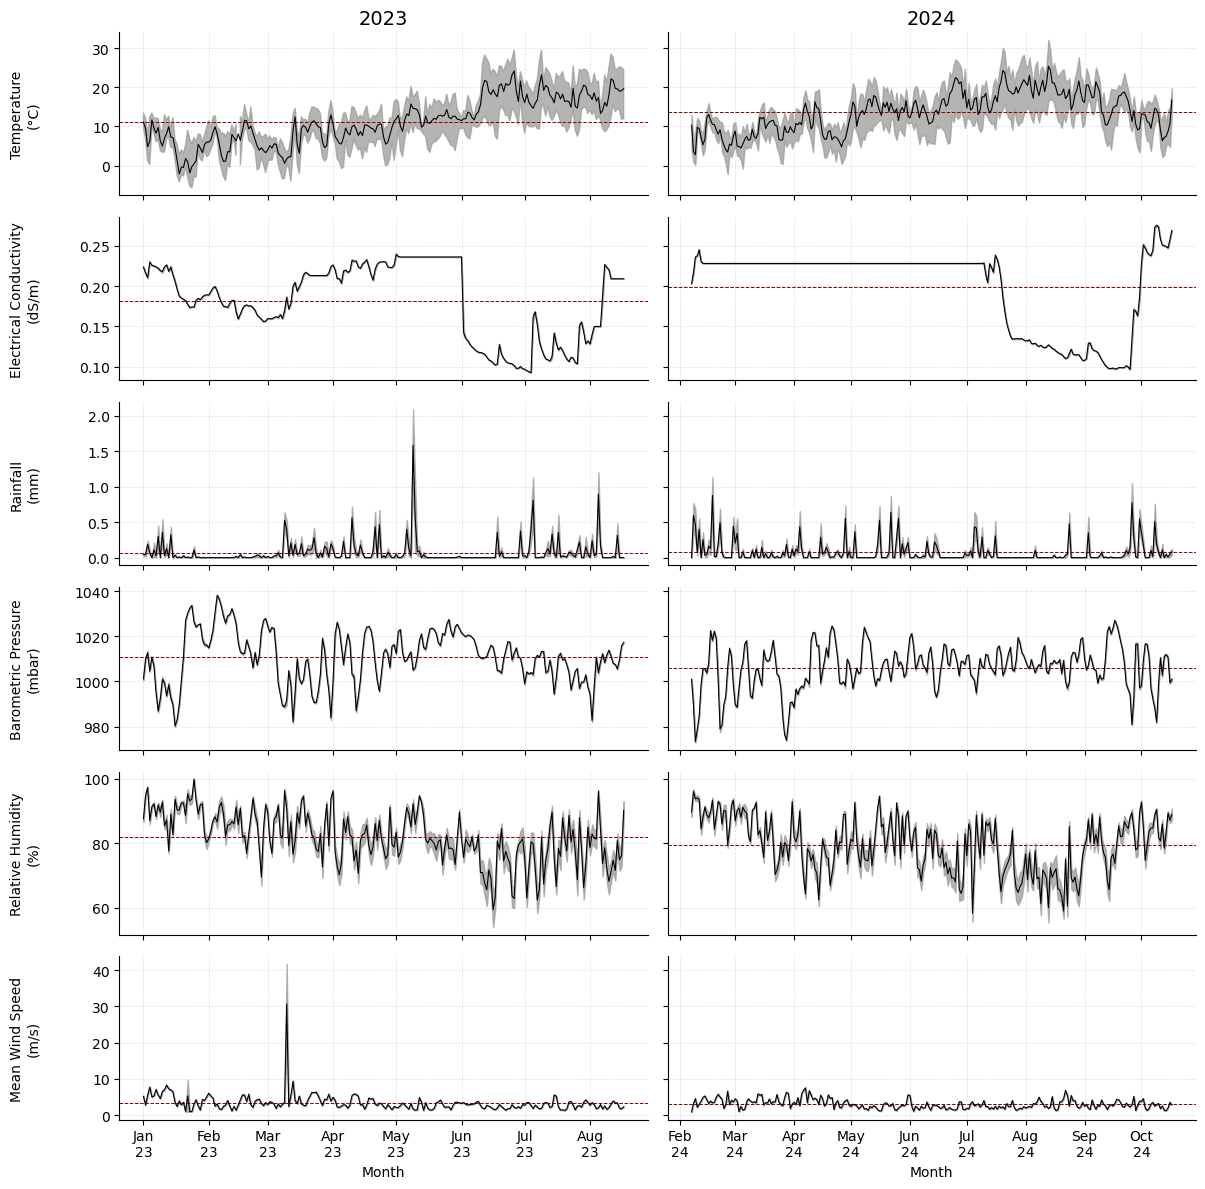

In [43]:

# Define your panel: (variable, source, nice_label)
panel_rows = [
    ('PTemp_C_Avg', 'daily', 'Temperature\n(°C)'),      # Daily temperature
    ('EC_Avg', 'hourly', 'Electrical Conductivity\n(dS/m)'),  # Hourly electrical conductivity
    ('Rain_mm_Tot', 'hourly', 'Rainfall\n(mm)'),         # Hourly rainfall
    ('BP_mbar_Avg', 'hourly', 'Barometric Pressure\n(mbar)'),  # Hourly barometric pressure
    ('RH', 'hourly', 'Relative Humidity\n(%)'),         # Hourly RH
    ('Mean_WS', 'ten_min', 'Mean Wind Speed\n(m/s)'),   # 10-min wind speed
]
years = [2023, 2024]

fig, axes = plt.subplots(len(panel_rows), len(years), figsize=(12, 12), sharex='col', sharey='row')

for row_idx, (variable, source, nice_label) in enumerate(panel_rows):
    for col_idx, year in enumerate(years):
        ax = axes[row_idx, col_idx]
        experiment = f'all_{year}'

        if source == 'daily':
            plot_daily_temperature_on_ax(experiment, ax)
        else:
            plot_grouped_mean_sem_data(experiment, variable, nice_label, ax, source)

        if row_idx == 0:
            ax.set_title(str(year), fontsize=14)
        if col_idx == 0:
            ax.set_ylabel(nice_label, fontsize=10)
            ax.yaxis.set_label_coords(-0.15, 0.5)
        else:
            ax.set_ylabel('')
        if row_idx == len(panel_rows) - 1:
            ax.set_xlabel('Month')
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        ax.grid(axis='both', linestyle='--', linewidth=0.5, alpha=0.4)

plt.tight_layout()

plt.savefig(f'../Graphs/panel_weather_plot.pdf')